In [10]:
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as datasets
import torchvision.transforms as T
import torchvision.utils as vutils
from torch.utils.data import DataLoader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# setting the manual seed
manualSeed = 1000

print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random Seed:  1000


In [12]:
device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")

In [3]:
DATAROOT = "./gan-getting-started"
WORKERS = 2
BATCH_SIZE = 128
OUT_IMG_SIZE = 256
IN_CHANNELS = 3
ENCODED_SIZE = 14
GEN_FEATURE_SIZE = 64
DISC_FEATURE_SIZE = 64
NUM_EPOCHS = 5
lr = 0.0002
BETA1 = 0.5

In [6]:
transform = T.Compose([T.Resize(OUT_IMG_SIZE), T.CenterCrop(OUT_IMG_SIZE), T.ToTensor(), T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_dataset = datasets.ImageFolder(root = "./gan-getting-started/train", transform=transform)

In [13]:
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=WORKERS)

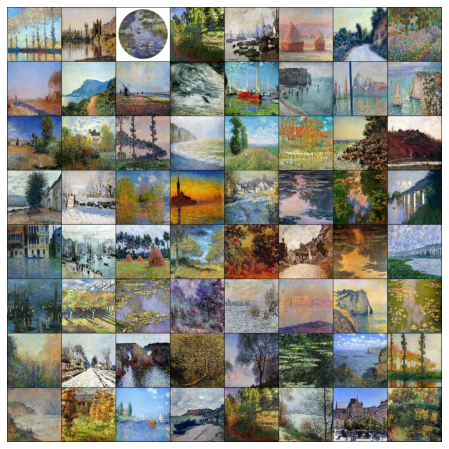

In [16]:
real_batch = next(iter(train_loader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(), (1, 2, 0)))